


# Construcción de modelos neuronales para problemas de regresión.

Red neuronal para estimar el indice uv a travez del voltaje de salida de un divisor de voltaje de 300 ohms

In [ ]:
# Importamos las bibliotecas.

import numpy as np #NumPy se utiliza para realizar operaciones matemáticas.
import pandas as pd #Pandas se emplea para el análisis y manipulación de datos.
import matplotlib.pyplot as plt #Matplotlib es una biblioteca para crear gráficos.
import tensorflow as tf# TensorFlow es una plataforma de aprendizaje automático que permite construir y entrenar modelos de redes neuronales.
from tensorflow.keras.models import Sequential #Sequential es un tipo de modelo de red neuronal que permite crear una secuencia de capas lineales.
from tensorflow.keras.layers import Dense #Dense es una capa completamente conectada donde cada neurona está conectada con todas las neuronas de la capa anterior.
from tensorflow.keras import optimizers, backend
#optimizers proporciona diferentes algoritmos para optimizar los pesos del modelo durante el entrenamiento.
#backend se utiliza para acceder a funciones de bajo nivel en TensorFlow.
from sklearn.model_selection import train_test_split #train_test_split se emplea para dividir los datos en conjuntos de entrenamiento y prueba de manera aleatoria.
from google.colab import drive #Este módulo permite montar Google Drive en Google Colab.

In [ ]:
# Carga de los datos usando Pandas
# Conectar a Google Drive
#drive.mount('/content/drive')

# Cargar el archivo CSV
#dataset = pd.read_csv('/content/drive/MyDrive/DataSetUVF.csv')
dataset = pd.read_csv('datos.csv')

In [ ]:
dataset = pd.read_csv('datos.csv')

In [ ]:
dataset.head() #muestra los datos del dataset (3 de marzo del 2024)

,Hora,Vout330,Indice UV float
0,05:50,0.0147,0.56
1,06:00,0.0152,0.65
2,06:10,0.0158,0.66
3,06:20,0.0180,0.65
4,06:30,0.0329,0.65


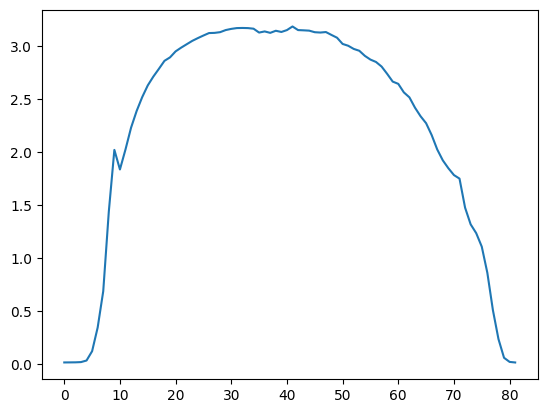

In [ ]:
# Visualización de los datos
plt.plot(dataset['Vout330']) #acercamiento a los datos
plt.show() #enseña la grafica

# Preprocesamiento

In [ ]:
# Estandarización de las características con calculo de la media

# Pasamos de formato la hora para que pueda ser procesada
dataset['Hora'] = pd.to_datetime(dataset['Hora'], format='%H:%M').dt.hour * 60 + pd.to_datetime(dataset['Hora'], format='%H:%M').dt.minute

# declaramos las columnas que vamos a estandarizar
caracteristicas_estandarizar = ['Hora', 'Vout330','Indice UV float']

#caracteristicas_estandarizar = ['Vout 330','Indice UV float']
medias = []
desviaciones = []
for caracteristica in caracteristicas_estandarizar:#el bucle paraq que calcule la media
    mean = dataset[caracteristica].mean() #promedio
    std = dataset[caracteristica].std()#desviacion estandar
    dataset[caracteristica] = (dataset[caracteristica] - mean)/std #se aplica la formula
    medias.append(mean)
    desviaciones.append(std)

# Mostrar medias y desviaciones
for i, caracteristica in enumerate(caracteristicas_estandarizar):
    print(f"Característica: {caracteristica}")
    print(f"Media: {medias[i]}")
    print(f"Desviación estándar: {desviaciones[i]}\n")


dataset.head()

Característica: Hora
Media: 755.0
Desviación estándar: 238.15261213488014

Característica: Vout330
Media: 2.2540182926829266
Desviación estándar: 1.073481780984517

Característica: Indice UV float
Media: 2.4275609756097563
Desviación estándar: 1.5932686806777652



,Hora,Vout330,Indice UV float
0,-1.700590,-2.086033,-1.172157
1,-1.658600,-2.085567,-1.115669
2,-1.616610,-2.085008,-1.109393
3,-1.574621,-2.082959,-1.115669
4,-1.532631,-2.069079,-1.115669


In [ ]:
# Separación de las características y las variables objetivo
caracteristicas = dataset[['Hora','Vout330']] #los datos de entrada
targets = dataset[['Indice UV float']] #el dato de salida

In [ ]:
targets #muestra los datos

,Indice UV float
0,-1.172157
1,-1.115669
2,-1.109393
3,-1.115669
4,-1.115669
...,...
77,-1.147051
78,-1.165881
79,-1.178433
80,-1.178433


In [ ]:
# Construcción de los conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(caracteristicas, targets, test_size=0.20)
#hacer el split del entrenamiento

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
#imprime la forma de las variables

(65, 2)
(65, 1)
(17, 2)
(17, 1)


In [ ]:
# Transformamos las series a arreglos de numpy

x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
x_test = np.asarray(x_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [ ]:
# Limpieza de modelos anteriores
backend.clear_session()

In [ ]:
# Definición del modelo
modelo = Sequential()
modelo.add(Dense(5, activation='sigmoid', use_bias = True, input_shape = (2,)))
modelo.add(Dense(3, activation='sigmoid'))
modelo.add(Dense(1, activation='linear'))

modelo.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Definición del optimizador
adam = optimizers.Adam(learning_rate = 0.1)#hipermarametro
# Compilación del modelo
modelo.compile(loss='mean_squared_error', optimizer=adam, metrics=['mse'])
# como calculara el error con el error cuadratico medio y las metricas mse es solo para la observacion

In [ ]:
# Entrenamiento del modelo
M = modelo.fit(x_train, y_train, epochs=300, verbose=1, validation_data=(x_test, y_test), batch_size=100,shuffle=True)
#verbose es para ver como va avanzado el modelo por epocas
#batch_size es el numero de registro que agrra por epoca y no tarde mucho
#shuffle en true no tiene razon si no tiene un batch es para que no tenga un sesgo en el modelo

Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.2240 - mse: 1.2240 - val_loss: 0.7598 - val_mse: 0.7598
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.9682 - mse: 0.9682 - val_loss: 0.6982 - val_mse: 0.6982
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 1.0134 - mse: 1.0134 - val_loss: 0.6711 - val_mse: 0.6711
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.9843 - mse: 0.9843 - val_loss: 0.6211 - val_mse: 0.6211
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.8719 - mse: 0.8719 - val_loss: 0.6014 - val_mse: 0.6014
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.7635 - mse: 0.7635 - val_loss: 0.6334 - val_mse: 0.6334
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.7057 - mse: 0.7057 - val_loss: 0.6776 - val_mse: 0.6776
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.6802 - mse: 0.6802 - val_loss: 0.6732 - val_mse: 0.6732
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.6384 - mse: 0

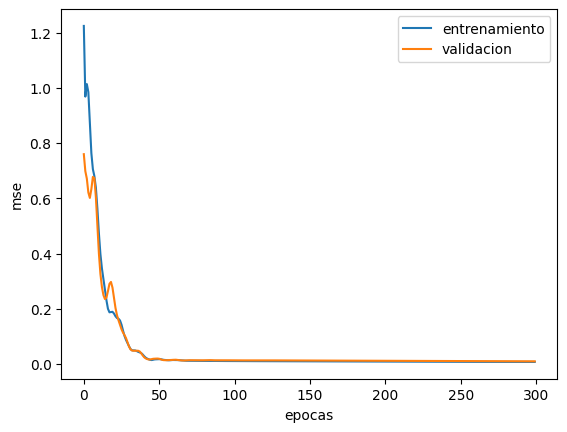

In [ ]:
# Análisis de la grafícas de aprendizaje
plt.plot(M.history['mse'], label='entrenamiento')
plt.plot(M.history['val_mse'], label='validacion')
plt.xlabel('epocas')
plt.ylabel('mse')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Extraer los pesos
for i, layer in enumerate(modelo.layers):
    weights, biases = layer.get_weights()
    print(f"Layer {i+1} - Weights:\n{weights}\n")
    print(f"Layer {i+1} - Biases:\n{biases}\n")

# Guardar los pesos en un archivo HDF5
modelo.save_weights('pesos_modelo.weights.h5')

Layer 1 - Weights:
[[-3.2715578  2.497885   6.9665523  2.057205   3.3873005]
 [-1.8573501 -4.024288  -2.3755133  3.0210018 -1.7949247]]

Layer 1 - Biases:
[ 1.4102386   1.2775004  -2.958583   -0.32650197 -0.07049409]

Layer 2 - Weights:
[[-1.145924   -1.8799506   2.2775207 ]
 [-2.3119195  -2.7515988   1.5818624 ]
 [ 0.15155801 -1.4706445   0.32743838]
 [ 1.9254225   1.9159601  -1.5622649 ]
 [-1.2625825  -0.21090733  0.6447825 ]]

Layer 2 - Biases:
[-0.5826452   0.09447829  0.22242178]

Layer 3 - Weights:
[[ 1.4864539]
 [ 2.255786 ]
 [-1.1317122]]

Layer 3 - Biases:
[-0.06128192]

